In [ ]:
# Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector



<h1>1- Matriz.</h1>

In [ ]:
x=np.array([[1.,2,3, 4],[5,6,7,8],[9,10,11,12]])
x

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [ ]:
# Ejer 1: Mostrar la columa 4
x[:,3]

array([ 4.,  8., 12.])

In [ ]:
#Ejer 2: mostrar la fila 1
x[0,:]

array([1., 2., 3., 4.])

In [ ]:
#Ejer 3: Extraer la submatriz de las filas 1 y 3
x_new = x[[0,2],:]
x_new

array([[ 1.,  2.,  3.,  4.],
       [ 9., 10., 11., 12.]])

<h1>2- Dataframe.</h1>

In [ ]:
#Ejer 4: crear un dataframe con una lista (ficticia) de municipios de Gran canaria y el número de habitantes separados por géneros (Masculino, Femenino, etc...)
df=pd.DataFrame(
    {"Municipios": np.array(["Agaete", "Aguimes", "Firgas", "Gáldar", "Las Palmas de GC", "Mogán", "Moya", "Telde", "Teror", "Valleseco"]),
     "Masculinos": np.array([1792, 2498, 1088, 999, 5788, 4774, 2123, 789, 3455, 1295]),
     "Femeninos": np.array([1839, 2190, 2334, 757, 5689, 4813, 3543, 800, 3211, 1678]),
    }
)
df

,Municipios,Masculinos,Femeninos
0,Agaete,1792,1839
1,Aguimes,2498,2190
2,Firgas,1088,2334
3,Gáldar,999,757
4,Las Palmas de GC,5788,5689
5,Mogán,4774,4813
6,Moya,2123,3543
7,Telde,789,800
8,Teror,3455,3211
9,Valleseco,1295,1678


In [ ]:
#Ejer 5: Mostrar los tipos de datos asociados a cada columna
df.dtypes

,0
Municipios,object
Masculinos,int64
Femeninos,int64


In [ ]:
#Ejer 6: modificar uno o más valores de una de las columnas
# Cambiar datos específicos de un municipio
df.loc[df["Municipios"] == "Agaete", ["Masculinos", "Femeninos"]] = [16000, 17000]

df

,Municipios,Masculinos,Femeninos
0,Agaete,16000,17000
1,Aguimes,2498,2190
2,Firgas,1088,2334
3,Gáldar,999,757
4,Las Palmas de GC,5788,5689
5,Mogán,4774,4813
6,Moya,2123,3543
7,Telde,789,800
8,Teror,3455,3211
9,Valleseco,1295,1678


In [ ]:
#Ejer 7: Cambiar alguno de los valores de forma directa
df.at[1, "Masculinos"] = 60000
df

,Municipios,Masculinos,Femeninos
0,Agaete,16000,17000
1,Aguimes,60000,2190
2,Firgas,1088,2334
3,Gáldar,999,757
4,Las Palmas de GC,5788,5689
5,Mogán,4774,4813
6,Moya,2123,3543
7,Telde,789,800
8,Teror,3455,3211
9,Valleseco,1295,1678


In [ ]:
#Ejer 8: Obtener estadística basica descriptiva
df.describe()

,Masculinos,Femeninos
count,10.000000,10.00000
mean,9631.100000,4201.50000
std,18274.562141,4774.22974
min,789.000000,757.00000
25%,1139.750000,1806.00000
50%,2789.000000,2772.50000
75%,5534.500000,4495.50000
max,60000.000000,17000.00000


<h1>3- DateTime.</h1>

In [ ]:
fechas = pd.date_range("20220910", periods=70)
fechas

DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
      

In [ ]:
df_fechas = pd.DataFrame(np.random.randn(70, 2),index=fechas,columns=["col1","col2"])
df_fechas

,col1,col2
2022-09-10,0.395403,0.225549
2022-09-11,1.762331,0.912391
2022-09-12,-0.383829,0.592397
2022-09-13,-0.414141,-0.547233
2022-09-14,0.503542,1.269678
...,...,...
2022-11-14,0.317375,0.746134
2022-11-15,1.245497,-1.390002
2022-11-16,-0.336822,-0.406474
2022-11-17,-0.161048,0.082188


In [ ]:
#Ejer 9: realizar un ejemplo de cada uno de los siguientes comandos:
#  df_fechas.head() primeros registros
#  df_fechas.tail() ultimos registros
#  df_fechas.index nombre de las filas
#  df_fechas.columns  nombre de las columnas
#  df_fechas.describe() estadística basica descriptiva
#  df_fechas.T transpuesta
df_fechas.T

,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,...,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18
col1,0.395403,1.762331,-0.383829,-0.414141,0.503542,0.260548,1.272974,-3.372097,0.187042,-0.048997,...,-0.298678,-0.157539,0.326283,0.355929,0.854362,0.317375,1.245497,-0.336822,-0.161048,0.929312
col2,0.225549,0.912391,0.592397,-0.547233,1.269678,-0.050857,1.643336,-0.481912,1.141351,0.436564,...,-0.272544,0.731825,-1.541265,-0.092920,1.791070,0.746134,-1.390002,-0.406474,0.082188,-0.549108


In [ ]:
#Ejer 10: Crear una función anónima denomminada mi_funcion_rango, que pasándole por parámetro la columna "C"
# de df obtenga el rango de los valores que forman parte de dicha columna
datos = {
    "A": [4, 63, 71, 19, 40],
    "B": [2, 40, 55, 11, 22],
    "C": [3, 5, 2, 2, 9]
}
df_datos = pd.DataFrame(datos)
mi_funcion_rango = lambda columna: columna.max() - columna.min()
rango = mi_funcion_rango(df_datos['C'])

rango

7

<h1>4- Dataset Comunidades autónomas</h1>

In [ ]:
# El enlace: https://drive.google.com/file/d/18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5/view
!gdown --id 18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
To: /content/datos.csv
100% 427/427 [00:00<00:00, 1.43MB/s]


In [ ]:
# Cargamos el fichero csv  denominado datos.csv con
comunidades= pd.read_csv('datos.csv', delimiter=';')
# importante--> OBSERVAR que Datos es un DataFrame como el df que se ha trabajado anteriormente
# Mostrar filas y columnas de la matriz de datos
comunidades.shape

(19, 3)

In [ ]:
comunidades

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
#Ejer 11: Volver a cambiar a CANARIAS
comunidades.iloc[4,0]= 'ISLAS CANARIAS'
comunidades

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,ISLAS CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
print(comunidades.columns)

Index(['Comunidad', 'Renta', 'DiferenciaRenta'], dtype='object')


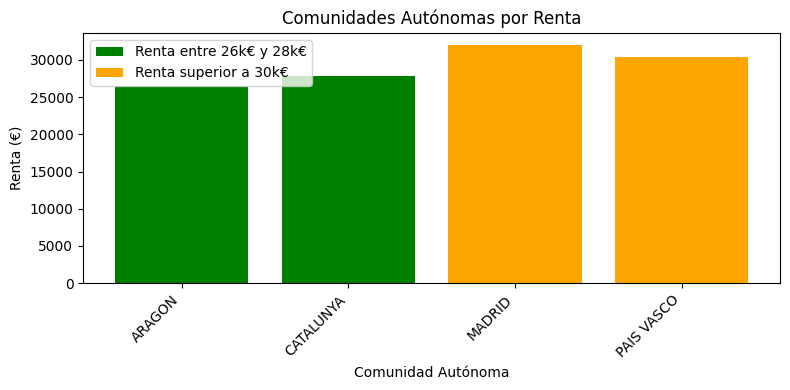

In [ ]:
#Ejer 12: Filtrando los datos en el dataframe Datos, identificar las comunidades autónomas cuya renta
#   Apartado 1: Renta entre 26000€ y 28000€
#   Apartado 2: Renta superior a 30000€
renta_entre = comunidades[(comunidades['Renta'] >= 26000) & (comunidades['Renta'] <= 28000)]
renta_superior = comunidades[comunidades['Renta'] > 30000]

plt.figure(figsize=(8, 4))

plt.bar(renta_entre['Comunidad'], renta_entre['Renta'], color='green', label='Renta entre 26k€ y 28k€')
plt.bar(renta_superior['Comunidad'], renta_superior['Renta'], color='orange', label='Renta superior a 30k€')

plt.title('Comunidades Autónomas por Renta')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Renta (€)')
plt.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
renta_entre

,Comunidad,Renta,DiferenciaRenta
1,ARAGON,26512,-7.8
8,CATALUNYA,27812,-10.9


In [ ]:
renta_superior

,Comunidad,Renta,DiferenciaRenta
12,MADRID,32048,-11.1
15,PAIS VASCO,30401,-10.4
